In [6]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [7]:
df=pd.read_csv('data_cables_demanda.csv',sep=';', encoding='latin-1')
df.columns

In [9]:
#revisemos las subfamilias que hay 
df['SubcategoriaPricing'].unique()

array(['Aluminio Aislado y Desnudo                                                      ',
       'Concéntrico                                                                     ',
       'Control o Cordon Cubierta PVC                                                   ',
       'Desnudo Blando                                                                  ',
       'Desnudo Rígido                                                                  ',
       'Esmaltado Cobre                                                                 ',
       'Mono conductor Baja Tensión Cubierta Libre halogenos                            ',
       'Mono conductor Baja Tensión Cubierta PVC                                        ',
       'Multi conductor Baja Tensión Cubierta Libre halogenos                           ',
       'Multi conductor Baja Tensión Cubierta PVC                                       ',
       'Especiales Uso Naval y Marino Sumergido                                         ',

In [106]:
#seleccionamos una de las subfamilias
df_subfamilia=df[df.SubcategoriaPricing.str.strip()=='Mono conductor Baja Tensión Cubierta PVC']
df_subfamilia

,periodo_vta,ano_vta,mes_vta,mes_char_vta,CategoriaPricing,SubcategoriaPricing,TipoOferta,RUT_CLI,N_VTA,ITEM,...,MARGEN_WAC,MARGEN_WAC_FORMULA,MARGEN_COM,cantidad,nivel1,nivel2,nivel3,flag_descuento,id,MargenCotizacion
2031,202101,2021,1,Jan,CABLES Y ALAMBRES ...,Mono conductor Baja Tensión Cubierta PVC ...,normal,76268339,1492399,MD110006,...,98410.760,98410.760,76685.0,700,NORMAL,Sin Descuento,Sin Descuento,Sin Descuento,239694.0,0.2219
2032,202101,2021,1,Jan,CABLES Y ALAMBRES ...,Mono conductor Baja Tensión Cubierta PVC ...,normal,76268339,1492399,MD40416,...,24824.720,24824.720,16660.0,400,NORMAL,Sin Descuento,Sin Descuento,Sin Descuento,239694.0,0.2219
2033,202101,2021,1,Jan,CABLES Y ALAMBRES ...,Mono conductor Baja Tensión Cubierta PVC ...,normal,93372000,1500003,MD110185,...,1254407.920,1254407.920,1016000.0,400,CONVENIOS,-,-,Sin Descuento,248711.0,0.1749
2034,202101,2021,1,Jan,CABLES Y ALAMBRES ...,Mono conductor Baja Tensión Cubierta PVC ...,normal,96843140,1491344,MD110185,...,492645.465,492645.465,359700.0,150,CONVENIOS,-,-,Sin Descuento,239289.0,0.1795
2035,202101,2021,1,Jan,CABLES Y ALAMBRES ...,Mono conductor Baja Tensión Cubierta PVC ...,Liquidac,76236098,1500074,MD40017,...,-857998.800,-857998.800,70800.0,6000,OFERTAS,OFERTA,Oferta Liquidacion,Sin Descuento,248864.0,0.2000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
128618,202312,2023,12,Dec,CABLES Y ALAMBRES ...,Mono conductor Baja Tensión Cubierta PVC ...,normal,77269117,1836009,TP50010,...,93088.698,93088.698,91080.0,30,NORMAL,Sin Descuento,Sin Descuento,Sin Descuento,6484069.0,0.3427
128619,202312,2023,12,Dec,CABLES Y ALAMBRES ...,Mono conductor Baja Tensión Cubierta PVC ...,normal,77391112,1833100,TP40002,...,106400.900,106400.900,89400.0,200,NORMAL,Sin Descuento,Sin Descuento,Sin Descuento,6479488.0,0.2635
128620,202312,2023,12,Dec,CABLES Y ALAMBRES ...,Mono conductor Baja Tensión Cubierta PVC ...,normal,77636854,1836889,TP40002,...,2998.366,2998.366,2410.0,10,NORMAL,Sin Descuento,Sin Descuento,Sin Descuento,6485246.0,0.1629
128621,202312,2023,12,Dec,CABLES Y ALAMBRES ...,Mono conductor Baja Tensión Cubierta PVC ...,normal,78213820,1828744,TP50010,...,143800.000,143800.000,143800.0,100,NORMAL,Con Descuento,Descuento Proveedor,Descuento Proveedor,6471693.0,0.2001


In [107]:
#seleccionamos 1 subfamilia 
df_subfamilia=df_subfamilia[['periodo_vta', 'NEGOCIO', 'total',  'MARGEN_COM', 'cantidad', 'nivel1', 'nivel2', 'nivel3','RUT_CLI']]
df_subfamilia=df_subfamilia[(df_subfamilia.NEGOCIO=='Distribución')*
              (df_subfamilia.total>0)*
              (df_subfamilia.MARGEN_COM>0)*
              (df_subfamilia.cantidad>0)*
              (df_subfamilia.nivel1=='NORMAL')*
              (df_subfamilia.nivel3!='Descuento Proveedor')*
              (df_subfamilia.periodo_vta>=202303)#*
           #   (df_subfamilia.RUT_CLI>=6666666)
              ]

In [108]:
df_subfamilia['margen_per']=df_subfamilia.MARGEN_COM/df_subfamilia.total

In [109]:
df_subfamilia

,periodo_vta,NEGOCIO,total,MARGEN_COM,cantidad,nivel1,nivel2,nivel3,RUT_CLI,margen_per
100637,202303,Distribución,31100.00,6300.00,100,NORMAL,Sin Descuento,Sin Descuento,93141000,0.202572
100643,202303,Distribución,1476000.00,268000.00,4000,NORMAL,Con Descuento,Descuento Propio,84071600,0.181572
100644,202303,Distribución,231866.62,39266.62,200,NORMAL,Sin Descuento,Sin Descuento,7372864,0.169350
100645,202303,Distribución,54600.00,10400.00,200,NORMAL,Sin Descuento,Sin Descuento,8571343,0.190476
100646,202303,Distribución,55000.00,10800.00,200,NORMAL,Sin Descuento,Sin Descuento,8571343,0.196364
...,...,...,...,...,...,...,...,...,...,...
128617,202312,Distribución,1715940.00,667620.00,180,NORMAL,Sin Descuento,Sin Descuento,77233479,0.389070
128618,202312,Distribución,265800.00,91080.00,30,NORMAL,Sin Descuento,Sin Descuento,77269117,0.342664
128619,202312,Distribución,337200.00,89400.00,200,NORMAL,Sin Descuento,Sin Descuento,77391112,0.265125
128620,202312,Distribución,14800.00,2410.00,10,NORMAL,Sin Descuento,Sin Descuento,77636854,0.162838


Text(0.5, 9.444444444444438, 'Margen')

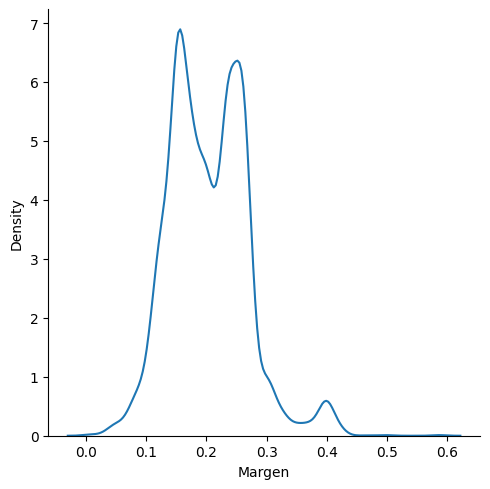

In [118]:
sns.displot(data=df_subfamilia, x="margen_per",kind="kde")

plt.xlabel('Margen')

In [111]:
def linspace(start, stop, step=1.):
  return np.linspace(start, stop, int((stop - start) / step + 1))
margin=linspace(0,np.round(max(df_subfamilia.margen_per),2), step=.01).tolist()
total_venta=df_subfamilia.total.sum()/6
vol_venta=[(total_venta-sum(df_subfamilia.total[df_subfamilia.margen_per>i])/6)/total_venta for i in margin]

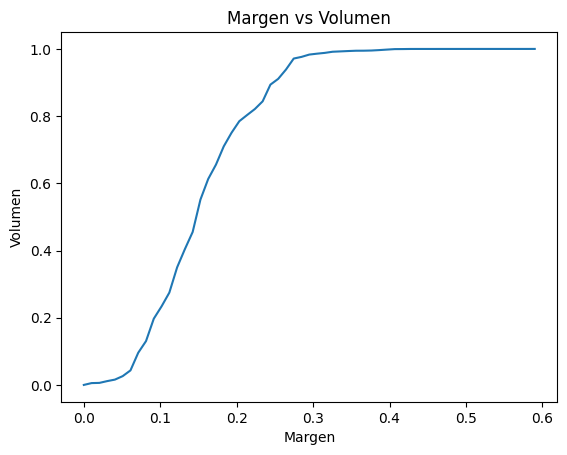

In [116]:
plt.plot(margin,vol_venta)
plt.title('Margen vs Volumen')
plt.xlabel('Margen')
plt.ylabel('Volumen')
plt.show()

In [113]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import minimize
# Función para el modelo logístico
def modelo_logistico(P, r, K):
    return r * P * (1 - P / K)
def ajuste_modelo(r):
    # Parámetros del Modelo Logístico (ajustar según sea necesario)
    #r =0.5# Tasa de crecimiento
    K = 1  # Capacidad de carga
    P0 =vol_venta[0]+0.01  # Población inicial basada en los datos
    # Parámetros de la simulación
    T = len(margin)    # Tiempo total de simulación

    dt = 1  # Paso de tiempo (h)
    n = int(T / dt)  # Número de pasos
    # Inicialización para el Modelo Logístico
    P = np.zeros(n)  # Vector para almacenar la población en cada paso
    t_modelo = np.arange(0, T, dt)  # Vector de tiempo para el modelo
    P[0] = P0 
    # Método de Euler Mejorado (Método de Heun) para el Modelo Logístico
    for i in range(n - 1):
        dP_inicio = modelo_logistico(P[i], r, K)
        P_pred = P[i] + dP_inicio * dt
        dP_fin = modelo_logistico(P_pred, r, K)
        P[i + 1] = P[i] + (dP_inicio + dP_fin) * dt / 2  # Promedio de pendientes
    return(P)
P=ajuste_modelo(0.41)

In [114]:
# Función objetivo para la optimización (ajuste de curvas)
def objective(params):
    model_solution = ajuste_modelo(params)
    return np.sum((model_solution - vol_venta)**2)  # Minimizar la suma de cuadrados de las diferencias
# Valores iniciales para los parámetros
initial_guess = [0.13]
# Optimización
result = minimize(objective, initial_guess, method='BFGS')
optimized_params = result.x
print(optimized_params[0])

0.31154364889281694


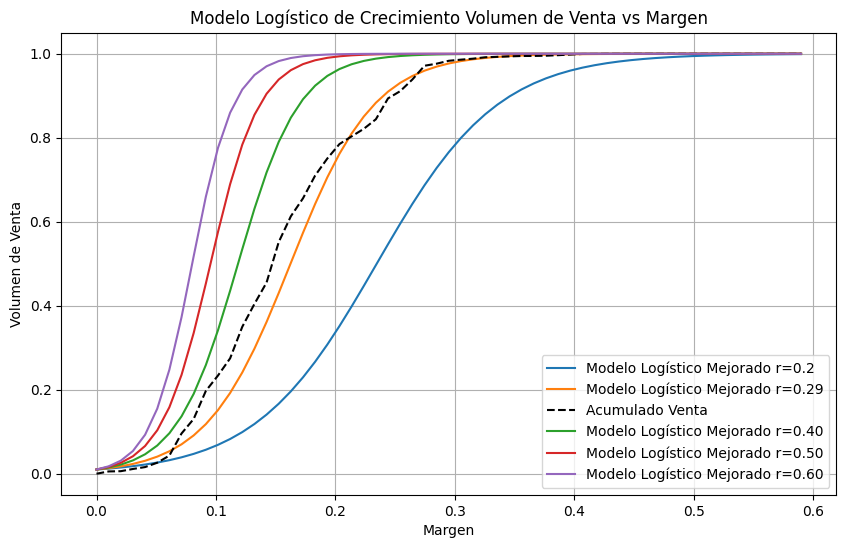

In [127]:
P=ajuste_modelo(optimized_params[0])

# Visualización de los datos observados y el modelo
plt.figure(figsize=(10, 6))
P=ajuste_modelo(0.20)
plt.plot(margin, P, label='Modelo Logístico Mejorado r=0.2')
P=ajuste_modelo(0.29)
plt.plot(margin, P, label='Modelo Logístico Mejorado r=0.29')
plt.plot(margin, vol_venta, label='Acumulado Venta',color='black',linestyle='--')
P=ajuste_modelo(0.40)
plt.plot(margin, P, label='Modelo Logístico Mejorado r=0.40')
P=ajuste_modelo(0.50)
plt.plot(margin, P, label='Modelo Logístico Mejorado r=0.50')
P=ajuste_modelo(0.60)
plt.plot(margin, P, label='Modelo Logístico Mejorado r=0.60')
plt.xlabel('Margen')
plt.ylabel('Volumen de Venta')
plt.title('Modelo Logístico de Crecimiento Volumen de Venta vs Margen')
plt.legend()
plt.grid(True)
plt.show()
